# ML Technique - SVM

Sources: https://github.com/cmadusankahw/email-spam-detection-with-SVM

https://www.kaggle.com/code/elnahas/phishing-email-detection-using-svm-rfc

In [1]:
!pip install scikit-learn


In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Load the Dataset

In [5]:
# Load the dataset
data_path = 'masterDataset.csv'
master_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
master_data.head()

,Subject,Body,label,Body_Length
0,good day,greetings i am sorry to encroach into your pri...,1,517
1,rescheduled dates for pros 9th annual pricing ...,world events and resulting airlineindustry act...,0,805
2,re graph2,please find attached the q1 q2 q3 and q4 nymex...,0,109
3,transaction completed,hello advisinguvicca paypal 25feb2022 063703 a...,1,1433
4,2022 employee benefits plan,the employee benefits program will now be supp...,1,1267


In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Combine the Subject and Body columns to form the feature set
master_data['text'] = master_data['Subject'].fillna('') + ' ' + master_data['Body'].fillna('')

# Define the feature and target variable
X = master_data['text']
y = master_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a linear SVM model using LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9805573558003888
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1038
           1       0.99      0.95      0.97       505

    accuracy                           0.98      1543
   macro avg       0.98      0.97      0.98      1543
weighted avg       0.98      0.98      0.98      1543

Confusion Matrix:
[[1034    4]
 [  26  479]]


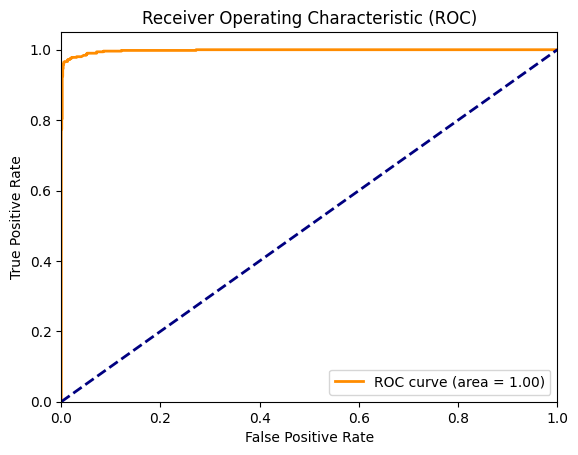

In [12]:
y_score = svm_model.decision_function(X_test_tfidf)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()